In [2]:
import requests
import pandas as pd
from datetime import datetime
import os
import gzip
import shutil
import pandas as pd
from sklearn.impute import KNNImputer
from datetime import datetime
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, trim
import requests
import pandas as pd
from datetime import datetime
from pyspark.sql.functions import col, isnan

In [3]:
# FMP API key
api_key = '47461a32a9bcf3b0a6c2c6e98ccfab42'

# Symbol for EURO STOXX 50
stock_symbol = '^STOXX50E'

# URL for the FMP historical data endpoint
url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{stock_symbol}?from=2004-10-01&to={datetime.now().strftime("%Y-%m-%d")}&apikey={api_key}'

# FMP API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    data = response.json()

    # Extract the historical data
    if 'historical' in data:
        historical_data = data['historical']

        # Convert to a pandas DataFrame
        index_data = pd.DataFrame(historical_data)

        # Display the DataFrame
        print(index_data)
    else:
        print("No 'historical' data found in the response.")
else:
    print(f'Failed to retrieve data: {response.status_code}')


            date         open         high          low        close  \
0     2024-01-05  4458.740230  4474.879880  4418.080080  4463.509770   
1     2024-01-04  4451.720210  4476.720210  4443.419920  4474.009770   
2     2024-01-03  4514.200200  4515.700200  4433.140140  4448.129880   
3     2024-01-02  4528.450200  4568.799800  4484.819820  4512.810060   
4     2023-12-29  4518.120120  4536.439940  4517.310060  4521.649900   
...          ...          ...          ...          ...          ...   
4867  2004-10-07  2834.620117  2834.620117  2834.620117  2834.620117   
4868  2004-10-06  2831.879883  2831.879883  2831.879883  2831.879883   
4869  2004-10-05  2830.120117  2830.120117  2830.120117  2830.120117   
4870  2004-10-04  2823.459961  2823.459961  2823.459961  2823.459961   
4871  2004-10-01  2796.080078  2796.080078  2796.080078  2796.080078   

         adjClose    volume  unadjustedVolume    change  changePercent  \
0     4463.509770         0                 0   4.76954      

In [4]:
index_data.describe()

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,changeOverTime
count,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4.872000e+03,4.872000e+03,4872.000000,4872.000000,4872.000000,4872.000000
mean,3311.289038,3331.727832,3289.093923,3311.057938,3311.057320,2.311683e+07,2.312230e+07,-0.231100,-0.002066,1872.105908,-0.000021
std,585.307602,583.603326,587.710339,585.657011,585.655909,2.570864e+07,2.570655e+07,35.375452,1.166811,1774.854013,0.011668
min,1812.780029,1823.250000,1765.489990,1809.979981,1809.979981,0.000000e+00,0.000000e+00,-338.020020,-11.724000,0.000000,-0.117240
25%,2894.487488,2913.107483,2875.857422,2894.332581,2894.332581,0.000000e+00,0.000000e+00,-14.212462,-0.427000,0.000000,-0.004270
50%,3306.640015,3325.500000,3284.489990,3306.944946,3306.944946,2.265910e+07,2.267810e+07,0.000000,0.000000,2951.893350,0.000000
75%,3691.605042,3711.977478,3671.750000,3690.757507,3690.757507,4.011265e+07,4.011265e+07,15.815065,0.488000,3475.570842,0.004880
max,4555.779785,4593.109860,4542.109860,4557.569824,4557.569824,2.358453e+08,2.358453e+08,246.070070,10.076000,4555.620000,0.100760


In [5]:
# FMP API key
api_key = '47461a32a9bcf3b0a6c2c6e98ccfab42'

# Symbol for the stock (e.g., '^STOXX50E' for EURO STOXX 50)
stock_symbol = '^STOXX50E'

# Specify the time interval (e.g., '5min', '15min', '1hour', '4hour', '1day')
time_interval = '5min'

# Specify the period for RSI calculation
period = 14  # Commonly used period for RSI

# URL for the FMP RSI endpoint
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/{time_interval}/{stock_symbol}?type=rsi&period={period}&apikey={api_key}'

# FMP API request for RSI data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    data = response.json()

    # Convert to a pandas DataFrame
    rsi_data = pd.DataFrame(data)

    # Display the DataFrame
    print(rsi_data)
else:
    print(f'Failed to retrieve RSI data: {response.status_code}')


                    date     open      low     high    close  volume  \
0    2024-01-05 17:25:00  4463.68  4462.89  4465.19  4463.01       0   
1    2024-01-05 17:20:00  4463.82  4462.84  4464.30  4463.14       0   
2    2024-01-05 17:15:00  4469.19  4463.49  4469.19  4463.98       0   
3    2024-01-05 17:10:00  4467.49  4467.09  4470.13  4469.07       0   
4    2024-01-05 17:05:00  4467.66  4466.81  4469.15  4467.25       0   
..                   ...      ...      ...      ...      ...     ...   
607  2023-12-27 09:20:00  4522.92  4521.80  4529.41  4529.41       0   
608  2023-12-27 09:15:00  4523.71  4522.53  4525.11  4523.24       0   
609  2023-12-27 09:10:00  4520.81  4520.51  4523.56  4523.56       0   
610  2023-12-27 09:05:00  4527.18  4520.53  4527.18  4521.16       0   
611  2023-12-27 09:00:00  4521.80  4521.80  4528.61  4528.21       0   

           rsi  
0    51.771944  
1    51.967163  
2    53.170109  
3    61.132497  
4    59.098827  
..         ...  
607   0.000000  

In [6]:
# FMP API key
api_key = '47461a32a9bcf3b0a6c2c6e98ccfab42'

# URL for the FMP economic data endpoint (modify if there's a specific endpoint for interest rates)
url = f'https://financialmodelingprep.com/api/v3/economic/interest-rate/EUR?apikey={api_key}'

# FMP API request for interest rate data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    data = response.json()

    # Convert to a pandas DataFrame
    interest_rate_data = pd.DataFrame(data)

    # Assuming the data includes a date and interest rate, set the date as the index
    interest_rate_data['date'] = pd.to_datetime(interest_rate_data['date'])
    interest_rate_data.set_index('date', inplace=True)

    # Resample the data to get monthly data if necessary
    monthly_interest_rate = interest_rate_data.resample('M').mean()

    # Display the DataFrame
    print(monthly_interest_rate)
else:
    print(f'Failed to retrieve interest rate data: {response.status_code}')


Failed to retrieve interest rate data: 404


# Interest Rate API (Eurostat)

In [17]:
# Dataset code
dataset_code = "ei_mfir_m"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")


Dataset downloaded successfully.
Dataset unzipped successfully.


In [18]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'ei_mfir_m.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 's_adj', 'p_adj', 'indic', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['indic'] == 'MF-3MI-RT')
]

# Drop unnecessary columns
structured_data.drop(['freq', 's_adj', 'p_adj'], axis=1, inplace=True)

# Filter for date range (from October 1, 2004, onwards)
date_columns = structured_data.columns[3:]
dates_from_oct_2004 = date_columns[date_columns >= '2004-10-01 ']
structured_data = structured_data[['indic','geo'] + list(dates_from_oct_2004)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


In [19]:
# Filter out only the columns with date values for melting
date_columns = structured_data.columns[5:]  
data_for_melting = structured_data[['geo'] + list(date_columns)]

# Melt the DataFrame to change its structure
structured_data = pd.melt(data_for_melting, id_vars=['geo'], var_name='Period', value_name='Interest')

# Filter for 'geo' == 'EA'
Interest_data_ea = structured_data[structured_data['geo'] == 'EA']

# Apply forward filling
Interest_data_ea.loc[:, 'Interest'] = Interest_data_ea['Interest'].ffill()

# Rearrange the columns
Interest_data_ea = Interest_data_ea[['Period', 'geo', 'Interest']]

# Display the transformed DataFrame
pd.set_option('display.max_rows', None)  # This option displays all the rows
print(Interest_data_ea.head(10))


       Period geo  Interest
3    2005-02   EA  2.13840 
16   2005-03   EA  2.13720 
29   2005-04   EA  2.13720 
42   2005-05   EA  2.12560 
55   2005-06   EA  2.11100 
68   2005-07   EA  2.11940 
81   2005-08   EA  2.13250 
94   2005-09   EA  2.13910 
107  2005-10   EA  2.19660 
120  2005-11   EA  2.36090 


In [20]:
# Convert 'Period' to datetime
Interest_data_ea['Period'] = pd.to_datetime(Interest_data_ea['Period'])

# Set 'Period' as the index
Interest_data_ea.set_index('Period', inplace=True)

# Create a daily date range that covers the entire period in your data
start_date = Interest_data_ea.index.min()
end_date = Interest_data_ea.index.max()
all_days = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindex your DataFrame to this date range, forward filling the missing values
daily_interest_data = Interest_data_ea.reindex(all_days).ffill()

# Reset the index so 'Period' becomes a column again
daily_interest_data.reset_index(inplace=True)
daily_interest_data.rename(columns={'index': 'Period'}, inplace=True)

# Display the first 10 rows of the daily data
print(daily_interest_data.head(10))

      Period geo  Interest
0 2005-02-01  EA  2.13840 
1 2005-02-02  EA  2.13840 
2 2005-02-03  EA  2.13840 
3 2005-02-04  EA  2.13840 
4 2005-02-05  EA  2.13840 
5 2005-02-06  EA  2.13840 
6 2005-02-07  EA  2.13840 
7 2005-02-08  EA  2.13840 
8 2005-02-09  EA  2.13840 
9 2005-02-10  EA  2.13840 


/tmp/ipykernel_3876/1400875269.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Interest_data_ea['Period'] = pd.to_datetime(Interest_data_ea['Period'])


In [25]:
# Check if 'Period' is in the columns; if not, the index might already be the 'Period'
if 'Period' in Interest_data_ea.columns:
    Interest_data_ea['Period'] = pd.to_datetime(Interest_data_ea['Period'])
    Interest_data_ea.set_index('Period', inplace=True)
elif not isinstance(Interest_data_ea.index, pd.DatetimeIndex):
    # If the index is not a datetime, convert it
    Interest_data_ea.index = pd.to_datetime(Interest_data_ea.index)

# Create a daily date range
start_date = Interest_data_ea.index.min()
end_date = Interest_data_ea.index.max()
all_days = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindex to create a DataFrame with all days, introducing NaNs for days without data
daily_interest_data = Interest_data_ea.reindex(all_days)

# Convert the index to a numerical value for KNN
daily_interest_data['Day_Ordinal'] = daily_interest_data.index.map(datetime.toordinal)

# Extract the 'Interest' column for imputation
knn_data = daily_interest_data[['Day_Ordinal', 'Interest']].values

# Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation
knn_data_imputed = knn_imputer.fit_transform(knn_data)

# Put the imputed 'Interest' data back into the DataFrame
daily_interest_data['Interest'] = knn_data_imputed[:, 1]

# Drop the 'Day_Ordinal' column as it's no longer needed
daily_interest_data.drop('Day_Ordinal', axis=1, inplace=True)

# Reset index to make 'Period' a column again
daily_interest_data.reset_index(inplace=True)
daily_interest_data.rename(columns={'index': 'Period'}, inplace=True)

# If the 'geo' column is required, fill it with a constant value (e.g., 'EA')
daily_interest_data['geo'] = 'EA'

# Display the first 10 rows of the daily data
print(daily_interest_data.head(10))


      Period geo  Interest
0 2005-02-01  EA   2.13840
1 2005-02-02  EA   2.12988
2 2005-02-03  EA   2.12988
3 2005-02-04  EA   2.12988
4 2005-02-05  EA   2.12988
5 2005-02-06  EA   2.12988
6 2005-02-07  EA   2.12988
7 2005-02-08  EA   2.12988
8 2005-02-09  EA   2.12988
9 2005-02-10  EA   2.12988


# Bonds Yild API (Eurostat)

In [4]:
# Dataset code
dataset_code = "irt_euryld_d"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")


Dataset downloaded successfully.
Dataset unzipped successfully.


In [5]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'irt_euryld_d.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 'yld_curv', 'maturity', 'bonds', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['yld_curv'] == 'SPOT_RT') & 
    (structured_data['bonds'] == 'CGB_EA')
]

# Drop unnecessary columns
structured_data.drop(['freq', 'geo'], axis=1, inplace=True)

# Filter for date range (from October 1, 2004, onwards)
date_columns = structured_data.columns[3:]
dates_from_oct_2004 = date_columns[date_columns >= '2004-10-01 ']
structured_data = structured_data[['yld_curv', 'maturity', 'bonds'] + list(dates_from_oct_2004)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


/tmp/ipykernel_85306/3711088935.py:10: DtypeWarning: Columns (4417) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='\t')


In [6]:
# Filter out only the columns with date values for melting
date_columns = structured_data.columns[3:]  # Assuming date columns start from the 4th column
data_for_melting = structured_data[['maturity'] + list(date_columns)]

# Melt the DataFrame to change its structure
interest_data = pd.melt(data_for_melting, id_vars=['maturity'], var_name='Period', value_name='Rate')

# Specify the desired maturities (M1 to M12 and Y1 to Y30)
desired_maturities = [f'M{i}' for i in range(1, 3)] + [f'Y{i}' for i in range(1, 10)]

# Filter the DataFrame to include only the specified maturities
interest_data = interest_data[interest_data['maturity'].isin(desired_maturities)]

# Rearrange the columns
interest_data = interest_data[['Period', 'maturity', 'Rate']]

# Display the transformed DataFrame
pd.set_option('display.max_rows', None)  # This option displays all the rows
print(interest_data.head())


        Period maturity     Rate
0  2004-10-01       M10  2.22092
1  2004-10-01       M11  2.24739
2  2004-10-01        M3  2.03426
3  2004-10-01        M4  2.06099
4  2004-10-01        M5  2.08772


# Inflation Rate API (Eurostat)

In [58]:
# Dataset code
dataset_code = "prc_hicp_manr"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")

Dataset downloaded successfully.
Dataset unzipped successfully.


In [63]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'prc_hicp_manr.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 'unit', 'coicop', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['unit'] == 'RCH_A') & 
    (structured_data['coicop'] == 'CP00')
]

# Drop unnecessary columns
structured_data.drop(['freq'], axis=1, inplace=True)

# Filter for date range (from January 1, 2005, onwards)
date_columns = structured_data.columns[3:]
dates_from_oct_2004 = date_columns[date_columns >= '2004-10-01 ']
structured_data = structured_data[['unit', 'coicop', 'geo'] + list(dates_from_oct_2004)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


In [64]:
# Filter out only the columns with date values for melting
date_columns = structured_data.columns[5:]  # Assuming date columns start from the 6th column
data_for_melting = structured_data[['geo'] + list(date_columns)]

# Melt the DataFrame to change its structure
inflation_data = pd.melt(data_for_melting, id_vars=['geo'], var_name='Period', value_name='Inflation')

# Filter for 'geo' == 'EA'
inflation_data_ea = inflation_data[inflation_data['geo'] == 'EA']

# Apply forward filling
inflation_data_ea.loc[:, 'Inflation'] = inflation_data_ea['Inflation'].ffill()

# Rearrange the columns
inflation_data_ea = inflation_data_ea[['Period', 'geo', 'Inflation']]

# Display the transformed DataFrame
pd.set_option('display.max_rows', None)  # This option displays all the rows
print(inflation_data_ea.head(10))


       Period geo Inflation
9    2005-01   EA      1.9 
54   2005-02   EA      2.1 
99   2005-03   EA      2.2 
144  2005-04   EA      2.1 
189  2005-05   EA      2.0 
234  2005-06   EA      2.0 
279  2005-07   EA      2.1 
324  2005-08   EA      2.2 
369  2005-09   EA      2.6 
414  2005-10   EA      2.5 


In [67]:
# Convert 'Period' to datetime
inflation_data_ea['Period'] = pd.to_datetime(inflation_data_ea['Period'])

# Set 'Period' as the DataFrame index
inflation_data_ea.set_index('Period', inplace=True)

# Resample to daily data using forward fill
daily_data_ffill = inflation_data_ea.resample('D').ffill()

# Reset index to move 'Period' back to a column
daily_data_ffill.reset_index(inplace=True)

# Display the first 10 rows of the daily data
print(daily_data_ffill.head(10))


      Period geo  Inflation
0 2005-01-01  EA        1.9
1 2005-01-02  EA        1.9
2 2005-01-03  EA        1.9
3 2005-01-04  EA        1.9
4 2005-01-05  EA        1.9
5 2005-01-06  EA        1.9
6 2005-01-07  EA        1.9
7 2005-01-08  EA        1.9
8 2005-01-09  EA        1.9
9 2005-01-10  EA        1.9


/tmp/ipykernel_85306/1025499820.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inflation_data_ea['Period'] = pd.to_datetime(inflation_data_ea['Period'])


In [ ]:
# Create a daily date range that covers the entire period of your data
date_range = pd.date_range(start=inflation_data_ea.index.min(), end=inflation_data_ea.index.max(), freq='D')

# Create a new DataFrame for KNN imputation
daily_data_knn = pd.DataFrame(date_range, columns=['Period'])

# Merge with your existing data - this will introduce NaNs for days without data
daily_data_knn = daily_data_knn.merge(inflation_data_ea, on='Period', how='left')

# Convert 'Period' to a numerical value (e.g., days since start)
daily_data_knn['Period_ordinal'] = daily_data_knn['Period'].apply(lambda x: x.toordinal())

# Prepare data for KNN imputation
knn_data = daily_data_knn[['Period_ordinal', 'Inflation']]

# Initialize KNN Imputer - you can adjust the number of neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation
knn_data_imputed = knn_imputer.fit_transform(knn_data)

# Add imputed data back to DataFrame
daily_data_knn['Inflation'] = knn_data_imputed[:, 1]

# Convert 'Period_ordinal' back to datetime
daily_data_knn['Period'] = daily_data_knn['Period_ordinal'].apply(lambda x: pd.to_datetime(x, origin='julian', unit='D'))

# Drop the 'Period_ordinal' column
daily_data_knn.drop(columns='Period_ordinal', inplace=True)

# Display the first 10 rows of the daily data
print(daily_data_knn.head(10))


Forward Fill Statistics:
 count    228.000000
mean       2.117105
std        2.085743
min       -0.600000
25%        0.800000
50%        1.800000
75%        2.500000
max       10.600000
Name: Inflation, dtype: float64

KNN Imputation Statistics:
 count    228.000000
mean       2.117105
std        2.085743
min       -0.600000
25%        0.800000
50%        1.800000
75%        2.500000
max       10.600000
Name: Inflation, dtype: float64


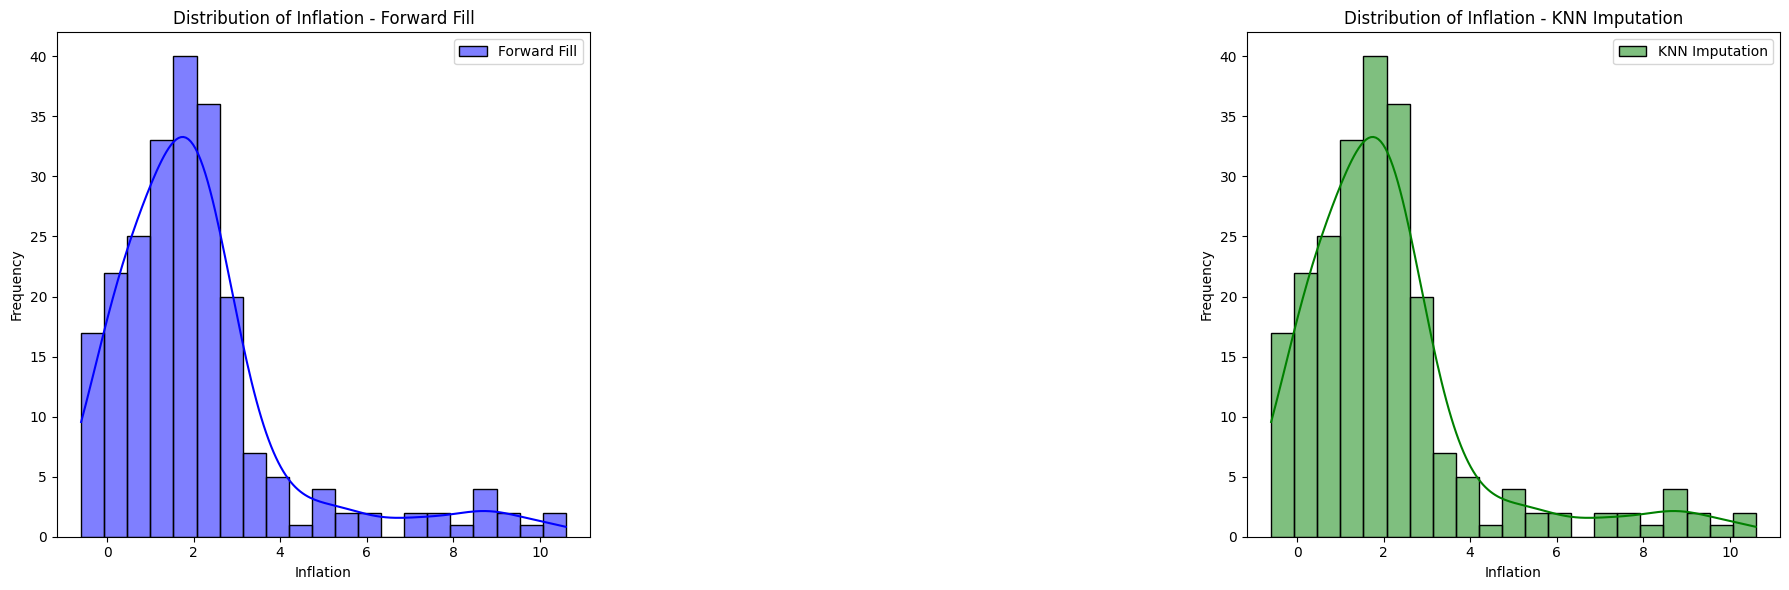

In [66]:

# Assuming inflation_data_ea (forward fill), inflation_data_ea_bfill (backward fill), 
# and inflation_data_ea_knn (KNN imputation) are your datasets

# Statistical Analysis
print("Forward Fill Statistics:\n", inflation_data_ea['Inflation'].describe())
print("\nKNN Imputation Statistics:\n", inflation_data_ea_knn['Inflation'].describe())

# Distribution Comparison
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(inflation_data_ea['Inflation'], kde=True, color='blue', label='Forward Fill')
plt.title('Distribution of Inflation - Forward Fill')
plt.xlabel('Inflation')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(inflation_data_ea_knn['Inflation'], kde=True, color='green', label='KNN Imputation')
plt.title('Distribution of Inflation - KNN Imputation')
plt.xlabel('Inflation')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:


# Create a Spark session
spark = SparkSession.builder \
    .appName("Stock Market Trends Analysis") \
    .getOrCreate()

# Convert the pandas DataFrames to Spark DataFrames
index_df = spark.createDataFrame(index_data)
interest_df = spark.createDataFrame(interest_data)

# Trim and convert 'date' in index_df and 'Period' in interest_df to DateType
index_df = index_df.withColumn("date", to_date(trim(col("date")), "yyyy-MM-dd"))
interest_df = interest_df.withColumn("Period", to_date(trim(col("Period")), "yyyy-MM-dd"))

# Create Temporary Views
index_df.createOrReplaceTempView("indexView")
interest_df.createOrReplaceTempView("interestView")

# SQL Query for Joining
join_query = """
SELECT i.date, i.open, i.high, i.low, i.close, i.volume, r.Rate, r.maturity
FROM indexView i
LEFT JOIN interestView r ON i.date = r.Period
"""

# Execute the query
dataset = spark.sql(join_query)

# Show the result
dataset.show(10)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/06 12:47:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+----------+---------+---------+----------+----------+------+-------+--------+
|      date|     open|     high|       low|     close|volume|   Rate|maturity|
+----------+---------+---------+----------+----------+------+-------+--------+
|2024-01-02|4528.4502|4568.7998|4484.81982|4512.81006|     0|2.74871|      Y9|
|2024-01-02|4528.4502|4568.7998|4484.81982|4512.81006|     0|2.67428|      Y8|
|2024-01-02|4528.4502|4568.7998|4484.81982|4512.81006|     0|2.59484|      Y7|
|2024-01-02|4528.4502|4568.7998|4484.81982|4512.81006|     0|2.51474|      Y6|
|2024-01-02|4528.4502|4568.7998|4484.81982|4512.81006|     0|2.44373|      Y5|
|2024-01-02|4528.4502|4568.7998|4484.81982|4512.81006|     0|2.40228|      Y4|
|2024-01-02|4528.4502|4568.7998|4484.81982|4512.81006|     0|3.27578|     Y30|
|2024-01-02|4528.4502|4568.7998|4484.81982|4512.81006|     0|2.43147|      Y3|
|2024-01-02|4528.4502|4568.7998|4484.81982|4512.81006|     0|3.27374|     Y29|
|2024-01-02|4528.4502|4568.7998|4484.81982|4512.8100

In [15]:
from pyspark.sql.functions import col, count, when, isnan

# DataFrame: joined_df
numeric_column_types = ['int', 'double', 'float', 'long']

# Counting zeros and nulls for each column
for column in dataset.columns:
    # Check if the column is numeric
    if str(dataset.schema[column].dataType) in numeric_column_types:
        zero_count = dataset.filter(col(column) == 0).count()
        null_or_nan_count = joined_df.filter(col(column).isNull() | isnan(col(column))).count()
    else:
        zero_count = 'N/A' # Not applicable for non-numeric columns
        null_or_nan_count = dataset.filter(col(column).isNull()).count() # Check only for nulls in non-numeric columns

    print(f"Column '{column}': Zeros = {zero_count}, Nulls or NaNs = {null_or_nan_count}")


Column 'date': Zeros = N/A, Nulls or NaNs = 0


Column 'open': Zeros = N/A, Nulls or NaNs = 0


Column 'high': Zeros = N/A, Nulls or NaNs = 0


Column 'low': Zeros = N/A, Nulls or NaNs = 0


Column 'close': Zeros = N/A, Nulls or NaNs = 0


Column 'volume': Zeros = N/A, Nulls or NaNs = 0


Column 'Rate': Zeros = N/A, Nulls or NaNs = 16


Column 'maturity': Zeros = N/A, Nulls or NaNs = 16


In [16]:
# Print the schema of the DataFrame
dataset.printSchema()

# Count the number of rows in the DataFrame
print("Number of rows:", dataset.count())

# Show statistical summaries of the DataFrame
dataset.describe().show()

root
 |-- date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: long (nullable = true)
 |-- Rate: string (nullable = true)
 |-- maturity: string (nullable = true)

Number of rows: 189400


24/01/06 12:47:32 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+------------------+-----------------+------------------+--------------------+------------------+--------+
|summary|              open|              high|              low|             close|              volume|              Rate|maturity|
+-------+------------------+------------------+-----------------+------------------+--------------------+------------------+--------+
|  count|            189400|            189400|           189400|            189400|              189400|            189384|  189384|
|   mean|3309.3123106771905|3329.7393291170915|3287.098411587976|3309.0333744823456| 2.313064480098733E7| 2.242308233430485|    NULL|
| stddev| 584.6077530495053| 582.8940899557197|587.0012108752727| 584.9178705041804|2.5721463195172083E7|1.7406153882562958|    NULL|
|    min|      1812.7800293|           1823.25|     1765.4899902|      1809.9799805|                   0|          -0.00104|     M10|
|    max|      4555.7797852|        4593.10986|       4542.109

In [18]:
from pyspark.sql.functions import col, count, when, isnan

# DataFrame: joined_df

# Count the total number of rows
total_rows = dataset.count()

# Count rows where 'Open' is available but 'Rate' is missing (Null or NaN)
missing_rate_with_open = dataset.filter(
    col("Rate").isNull() | isnan(col("Rate")) & col("open").isNotNull()
).count()

# Calculate the percentage of such instances
percentage_missing_rate_with_open = (missing_rate_with_open / total_rows) * 100

print(f"Total Rows: {total_rows}")
print(f"Rows with 'Open' but missing 'Rate': {missing_rate_with_open}")
print(f"Percentage of Rows with 'Open' but missing 'Rate': {percentage_missing_rate_with_open:.2f}%")


Total Rows: 189400
Rows with 'Open' but missing 'Rate': 16
Percentage of Rows with 'Open' but missing 'Rate': 0.01%


In [19]:


# DataFrame: joined_df

# Filter the DataFrame to get rows where 'Open' is available but 'Rate' is missing (Null or NaN)
missing_rate_rows = dataset.filter(
    (col("Rate").isNull() | isnan(col("Rate"))) & col("open").isNotNull()
)

# Show the rows with missing 'Rate' values
missing_rate_rows.show()


+----------+------------+------------+------------+------------+--------+----+--------+
|      date|        open|        high|         low|       close|  volume|Rate|maturity|
+----------+------------+------------+------------+------------+--------+----+--------+
|2022-06-22|      3494.0|      3494.0|3413.0400391|3464.6398926|31496400|NULL|    NULL|
|2020-12-24| 3542.850098|  3546.02002| 3539.790039| 3543.280029|       0|NULL|    NULL|
|2023-04-06|     4295.55|     4313.74|     4293.85|     4309.45|28509400|NULL|    NULL|
|2022-03-09|3548.4899902|3766.0200195|3548.4899902|3766.0200195|75625000|NULL|    NULL|
|2023-12-29|  4518.12012|  4536.43994|  4517.31006|   4521.6499|13276900|NULL|    NULL|
|2023-05-01| 4359.310059| 4359.310059| 4359.310059| 4359.310059|       0|NULL|    NULL|
|2024-01-05|  4458.74023|  4474.87988|  4418.08008|  4463.50977|       0|NULL|    NULL|
|2023-04-28|     4353.92|      4376.3|     4305.63|     4359.31|39594900|NULL|    NULL|
|2020-12-31| 3565.709961| 3571.6